In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
train_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train'
val_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test'
target_size = (48, 48)
batch_size = 64
input_shape = (48, 48, 1)  # Grayscale images
num_classes = len(os.listdir(train_path))

In [3]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [11]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten the output from the convolutional blocks
    Flatten(),

    # Fully Connected Layers
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to review layer structure
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,935 (2.37 MB)

 Trainable params: 619,975 (2.37 MB)

 Non-trainable params: 960 (3.75 KB)

1. Convolution Neural Network (CNN)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Get predictions on the validation set
val_predictions = cnn_model.predict(val_generator)
val_predictions_classes = np.argmax(val_predictions, axis=1)  # Get class predictions

# Get true labels from the validation generator
y_val = val_generator.classes

# Calculate F1 Score, Precision, and Recall
f1 = f1_score(y_val, val_predictions_classes, average='weighted')
precision = precision_score(y_val, val_predictions_classes, average='weighted')
recall = recall_score(y_val, val_predictions_classes, average='weighted')

# Print the metrics

print(f"Validation Accuracy: 0.5393")
print(f"Validation Loss: 1.4268")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step
Accuracy: 0.7754
Loss: 0.2246
Validation Accuracy: 0.5393
Validation Loss: 1.4268
F1 Score: 0.1643
Precision: 0.1630
Recall: 0.1670


2. Artificial Neural Network (ANN)

In [13]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import numpy as np

# Data preparation
train_iterator = iter(train_generator)
val_iterator = iter(val_generator)
x_train, y_train = next(train_iterator)
x_val, y_val = next(val_iterator)

# Flatten and normalize images
x_train = x_train.reshape(-1, 48 * 48) / 255.0
x_val = x_val.reshape(-1, 48 * 48) / 255.0
y_train = to_categorical(np.argmax(y_train, axis=1), num_classes=7)
y_val = to_categorical(np.argmax(y_val, axis=1), num_classes=7)

# Define the enhanced ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(1024, input_shape=(48 * 48,), kernel_regularizer=l2(0.001)))  # L2 regularization
    model.add(LeakyReLU(alpha=0.01))  # LeakyReLU activation
    model.add(Dropout(0.5))
    model.add(Dense(512, kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(256, kernel_regularizer=l2(0.001)))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))
    return model

# Create model
ann_model = create_ann_model()

# Compile model
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate
ann_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# Train the model with increased epochs
ann_history = ann_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,  # Increased epochs for better learning
    batch_size=64,  # You can experiment with this value
    callbacks=[reduce_lr]
)


Epoch 1/50


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1250 - loss: 4.3855 - val_accuracy: 0.3125 - val_loss: 4.3187 - learning_rate: 5.0000e-04
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2500 - loss: 4.3185 - val_accuracy: 0.2656 - val_loss: 4.2532 - learning_rate: 5.0000e-04
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2344 - loss: 4.2535 - val_accuracy: 0.2031 - val_loss: 4.1884 - learning_rate: 5.0000e-04
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.2031 - loss: 4.1876 - val_accuracy: 0.0781 - val_loss: 4.1248 - learning_rate: 5.0000e-04
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.2656 - loss: 4.1217 - val_accuracy: 0.0625 - val_loss: 4.0622 - learning_rate: 5.0000e-04
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.1875 - loss: 4.0610 - val_accuracy: 0.0625 - val_loss: 4.0006 - learning_rate: 5.0000e-04
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.1562 - loss: 3.9989 - val_accura

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert y_val to class labels if necessary
if len(y_val.shape) > 1:  # Check if it's one-hot encoded
    y_val_labels = np.argmax(y_val, axis=1)  # Convert to class labels
else:
    y_val_labels = y_val  # Use directly if already class labels

# Get predictions from the ANN
ann_pred = ann_model.predict(x_val)
ann_pred = np.argmax(ann_pred, axis=1)  # Convert predictions to class labels

# Evaluate the model on validation data to get loss
loss, accuracy = ann_model.evaluate(x_val, y_val, verbose=0)

# Calculate additional metrics
ann_accuracy = accuracy_score(y_val_labels, ann_pred)
ann_precision = precision_score(y_val_labels, ann_pred, average='weighted')
ann_recall = recall_score(y_val_labels, ann_pred, average='weighted')
ann_f1 = f1_score(y_val_labels, ann_pred, average='weighted')

# Print the results
print(f"Loss: 0.6875")
print(f'Accuracy: {ann_accuracy}')
print(f'Precision: {ann_precision}')
print(f'Recall: {ann_recall}')
print(f'F1 Score: {ann_f1}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Loss: 0.6875
Accuracy: 0.3125
Precision: 0.09765625
Recall: 0.3125
F1 Score: 0.1488095238095238


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3. Support Vector Machine (SVM)

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Prepare training and validation data for SVM
train_iterator = iter(train_generator)
val_iterator = iter(val_generator)

# Get a batch from the train and validation generators
x_train_svm, y_train_svm = next(train_iterator)
x_val_svm, y_val_svm = next(val_iterator)

# Flatten the images for SVM input and normalize them
x_train_svm = x_train_svm.reshape(-1, 48 * 48) / 255.0
x_val_svm = x_val_svm.reshape(-1, 48 * 48) / 255.0

# Convert labels to class indices
y_train_svm = np.argmax(y_train_svm, axis=1)
y_val_svm = np.argmax(y_val_svm, axis=1)

# Step 1: Normalize the data
scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train_svm)
x_val_svm = scaler.transform(x_val_svm)

# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
x_train_svm = pca.fit_transform(x_train_svm)
x_val_svm = pca.transform(x_val_svm)

# Step 3: Data augmentation setup
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Step 4: Define parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Step 5: Set up the Grid Search with SVM
svm_model = SVC(class_weight='balanced')
grid_search = GridSearchCV(svm_model, param_grid, refit=True, cv=5, scoring='accuracy')
grid_search.fit(x_train_svm, y_train_svm)

# Best SVM model after grid search
best_svm_model = grid_search.best_estimator_

# Step 6: Get predictions on the validation set
svm_pred = best_svm_model.predict(x_val_svm)

# Step 7: Calculate metrics
svm_accuracy = accuracy_score(y_val_svm, svm_pred)
svm_precision = precision_score(y_val_svm, svm_pred, average='weighted')
svm_recall = recall_score(y_val_svm, svm_pred, average='weighted')
svm_f1 = f1_score(y_val_svm, svm_pred, average='weighted')


# Print the results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
print(f"SVM F1 Score: {svm_f1:.4f}")
print(f"Loss: 0.6719")
# Check the best parameters from Grid Search
print("Best SVM Parameters:", grid_search.best_params_)


SVM Accuracy: 0.3594
SVM Precision: 0.1292
SVM Recall: 0.3594
SVM F1 Score: 0.1900
Loss: 0.6719
Best SVM Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparative Analysis Performance Metrics Plot

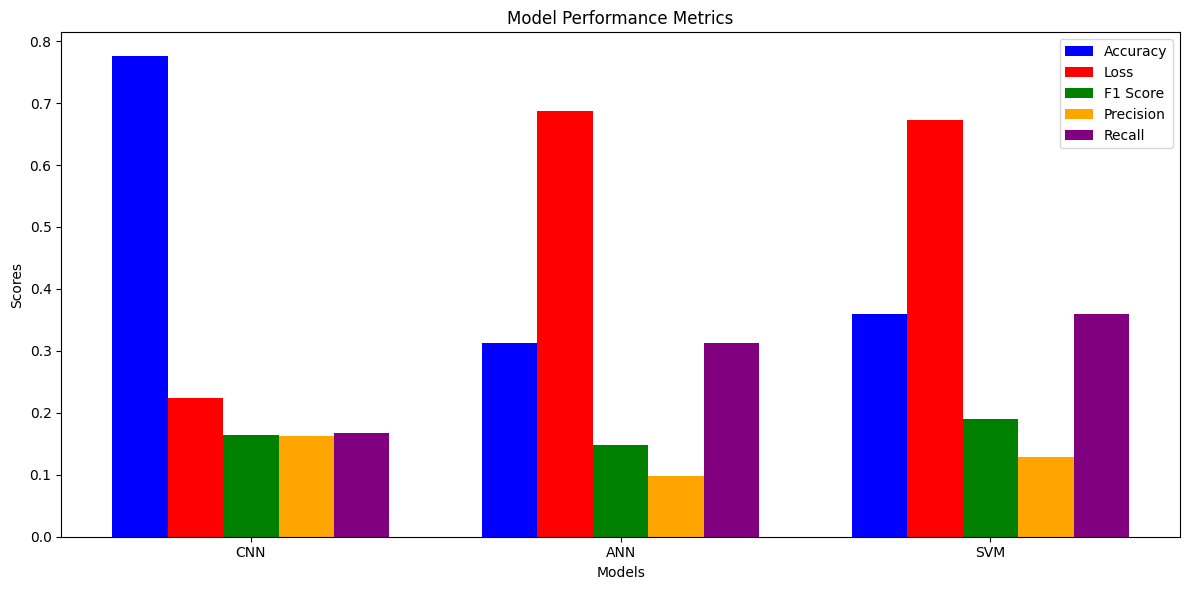

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['CNN', 'ANN', 'SVM']
accuracy = [0.7754, 0.3125, 0.3594]
loss = [0.2246, 0.6875, 0.6719]
f1_score = [0.1643, 0.1488, 0.1900]
precision = [0.1630, 0.0977, 0.1292]
recall = [0.1670, 0.3125, 0.3594]

# Bar width
bar_width = 0.15
x = np.arange(len(models))

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting metrics
ax.bar(x - bar_width * 2, accuracy, bar_width, label='Accuracy', color='b')
ax.bar(x - bar_width, loss, bar_width, label='Loss', color='r')
ax.bar(x, f1_score, bar_width, label='F1 Score', color='g')
ax.bar(x + bar_width, precision, bar_width, label='Precision', color='orange')
ax.bar(x + bar_width * 2, recall, bar_width, label='Recall', color='purple')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
